<a href="https://colab.research.google.com/github/betelgeus/fundamentals_of_statistics_notes/blob/main/Stepik_fundamentals_of_statistics_notes_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы статистики. Часть II

#### конспект лекций

Автор лекций: **Анатолий Карпов**





<hr>

## Содержание


### Часть 1 Анализ номинативных данных

 - [Расстояние Пирсона](#Расстояние-Пирсона)
 - [Распределение Хи-квадрат Пирсона](#Распределение-Хи-квадрат-Пирсона)
 - [Расчет p-уровня значимости](#Расчет-p-уровня-значимости)
 - [Анализ таблиц сопряженности](#Анализ-таблиц-сопряженности)
 - [Точный критерий Фишера](#Точный-критерий-Фишера)


### Часть 2 Логистическая регрессия и непараметрические методы 

 - [Номинативная зависимая переменная](#Номинативная-зависимая-переменная)
 - [Модель без предикторов. Intercept only model](#Модель-без-предикторов.-Intercept-only-model)
 - [Модель с одним номинативным предиктором](#Модель-с-одним-номинативным-предиктором)
 - [Модель с двумя номинативными предикторами](#Модель-с-двумя-номинативными-предикторами)
 - [Взаимодействие номинативных предикторов](#Взаимодействие-номинативных-предикторов)
 - [Когда нужно использовать непараметрические методы и почему?](#Когда-нужно-использовать-непараметрические-методы-и-почему?)
 - [Непараметрические методы. Продолжение.](#Непараметрические-методы.-Продолжение.)

### Часть 3 Кластерный анализ и метод главных компонент

 - [Кластерный анализ методом **k-средних**](#Кластерный-анализ-методом-k-средних)
 - [Может ли кластерный анализ "ошибаться"?](#Может-ли-кластерный-анализ-ошибаться?)
 - [Как определить оптимальное число кластеров?](#Как-определить-оптимальное-число-кластеров?)
 - [~**Иерархическая кластеризация**~](#Иерархическая-кластеризация)
 - [~Введение в метод анализа главных компонент~](#Введение-в-метод-анализа-главных-компонент)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<hr>

# Часть 1 Анализ номинативных данных

## Расстояние Пирсона
<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-28%20в%2017.06.04.png" width="1000px"/>

## Пример
Предположим, что в результате подбрасывания монетки шанс получить решку и орла должен быть 50/50. 

Сверим наше предположение с эмпирическими данными. Создадим генератор подбрасывания монетки, где 0 это орел, а 1 это решка. 
1. Подбросим монетку 60 раз
2. Посмотрим, как результат отклонился от ожидаемого значение. Для этого воспользуемся формулой расчета расстояния Пирсона
3. Повторим эксперимент 10 000 раз
4. Посмотрим на распределение отклонения на гистограмме

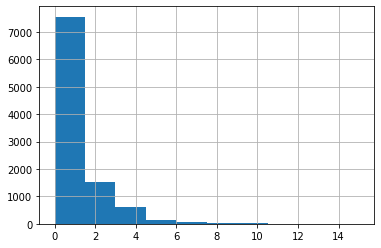

In [37]:
import random as random
import pandas as pd


coin = []
trial = 60
expect = trial / 2
for _ in range(10000):
  coin.append(sum([random.randrange(0,  2) for _ in range(trial)]))
coin = pd.Series(coin)
coin = (coin - expect) ** 2 / expect +  ((trial - coin) - expect) ** 2 / expect
coin.hist()

## Распределение Хи-квадрат Пирсона

Распределе́ние $ \chi^2 $ (хи-квадра́т) с $k$ степеня́ми свободы — это распределение суммы квадратов $k$ независимых **стандартных нормальных случайных величин**.


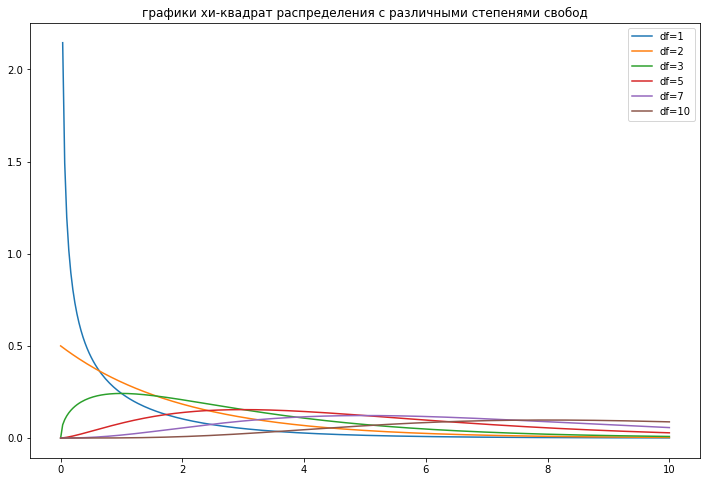

In [45]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

x = np.linspace(0, 10, 300)
# степень свободы
df_set = {1, 2 , 3, 5, 7, 10}

for df in df_set:
    y = chi2.pdf(x, df=df)
    plt.plot(x, y, label=f'df={df}')

plt.title('графики хи-квадрат распределения с различными степенями свобод')
plt.legend()
plt.show()

## Расчет p-уровня значимости

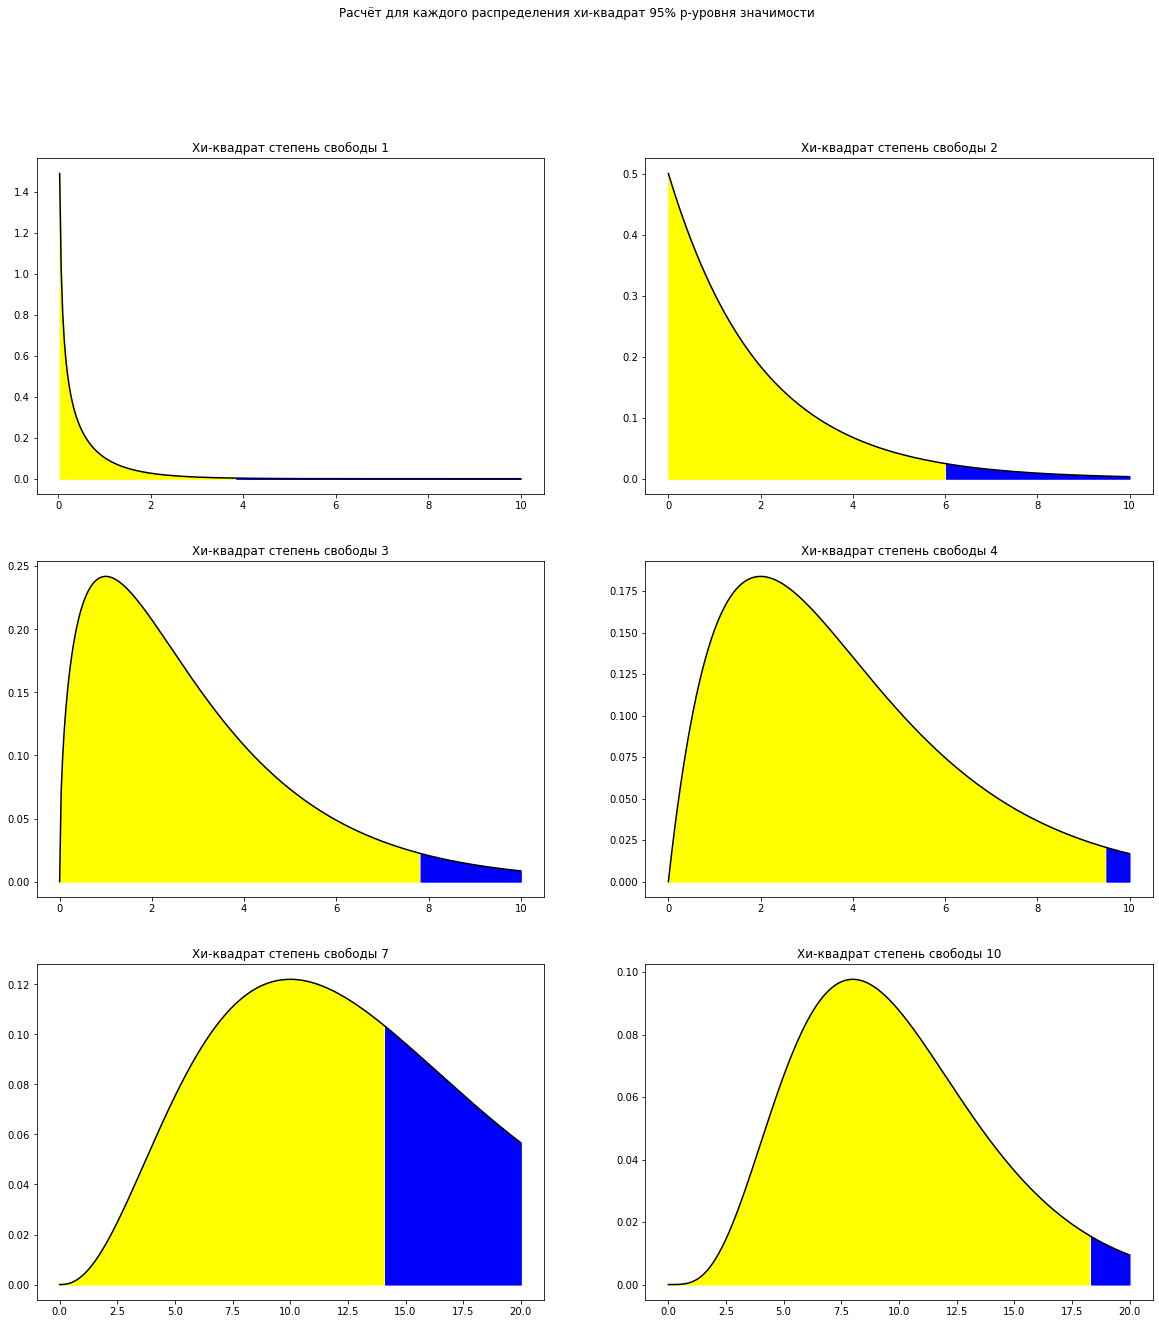

In [ ]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 21)

p = 0.95
x1 = np.linspace(0, 10, 300)
x2 = np.linspace(0, 20, 300)

fig, axs = plt.subplots(nrows=3, ncols=2)
axs =  axs.flat

for i, df in enumerate(df_set):
    chi_value = chi2.isf(1-p, df=df)
    y = chi2.pdf(x, df=df)
    x = x1 if df <= 4 else x2
    
    axs[i].set_title(f'Хи-квадрат степень свободы {df}')
    axs[i].plot(x, y, color='k')
    left_x, right_x = x <= chi_value, x >= chi_value
    axs[i].fill_between(x[left_x], y[left_x], color='yellow')
    axs[i].fill_between(x[right_x], y[right_x], color='blue')


fig.suptitle('Расчёт для каждого распределения хи-квадрат 95% p-уровня значимости')
plt.show()

### Примеры.1.4
Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?

In [2]:
from scipy.stats import chi2

# рассчитаем значение P value для Хи-квадрат равный 2
p_val_2 = 1 - chi2.cdf(2, df=2)
# рассчитаем значение P value для Хи-квадрат равный 4
p_val_4 = 1 - chi2.cdf(4, df=2)
# разница между 1 и 2 значением будет равна доле наблюдений
print(f'Доля наблюдений: {(p_val_2 - p_val_4)*100:.1f}%')

Доля наблюдений: 23.3%


In [ ]:
from scipy.stats import chi2

print(f'{chi2.cdf(4, df=2) - chi2.cdf(2, df=2):.4f}')

0.2325


Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10, 10, 10, 5, 10, 15

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся p-уровень значимости. 

In [3]:
from scipy.stats import chisquare


# Создадим два массива. Первый с эмпирическими данными, второй с ожидаемыми значениями
f_obs = [10, 10, 10, 5, 10, 15]
f_exp = [10, 10, 10, 10, 10, 10]
chi2, p_val = chisquare(f_obs, f_exp)
print('Chi-square:', chi2)
print('P-value:', round(p_val, 3))

Chi-square: 5.0
P-value: 0.416


In [12]:
from scipy.stats import chi2
import numpy as np

observed = np.array([10, 10, 10, 5, 10, 15])

def chi_value(observed):
    # e - expected
    e = np.mean(observed)
    return sum([((o - e)**2)/e for o in observed])

p = chi2.sf(chi_value(observed), df=(observed.size-1))
print(f'{p:.4f}')

0.4159


Вернемся к нашему примеру с политическими партиями! Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий. Введите в поле для ответа получившееся значение статистики хи-квадрат с точностью хотя бы до одной цифры после запятой.

Партия А: 10 избирателей
Партия Б: 30 избирателей
Партия В: 50 избирателей

In [5]:
from scipy.stats import chisquare

f_obs = [10, 30, 50]
chi2, _ = chisquare(f_obs)
print('Chi square:', round(chi2, 1))

Chi square: 26.7


Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности биоинформатиков!

Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас p-уровень значимости.

In [6]:
from scipy.stats import chisquare

f_obs = [9, 15]
p_val = chisquare(f_obs)[1]
print('P-value:', round(p_val, 3))

P-value: 0.221


In [15]:
from scipy.stats import chi2
import numpy as np

observed = np.array([15, 9])
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.2207


В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.

In [16]:
from scipy.stats import chisquare

positive = 1500 * .53
negative = 1500 * .47
f_obs = [positive, negative]
p_val = chisquare(f_obs)[1]
if p_val < 0.05:
    print('Отвергаем нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным.')
    print('P-value:', round(p_val, 4))
else:
    print('Принимаем нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным.')
    print('P-value:', round(p_val, 4))

Отвергаем нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным.
P-value: 0.0201


In [ ]:
n=1500
observed = np.array([0.53*n, 0.47*n], dtype='int32')
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.0201


## Анализ таблиц сопряженности
<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2013.11.02.png" width="600px"/>

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2013.11.16.png" width="600px"/>

## Примеры
В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.
<table>
<tr>
</td>
<td></td>
<td>1-ая грд. ф-ра. Y</td>
<td>2-ая грд. ф-ра. Y</td>
<td>Всего</td>
<tr>
<td>1-ая грд. ф-ра. X</td>
<td>10</td>
<td>6</td>
<td>16</td>
</td>
<tr>
<td>2-ая грд. ф-ра. X</td>
<td>5</td>
<td>15</td>
<td>20</td>
</td>
<tr>
<td>Всего</td>
<td>15</td>
<td>21</td>
<td></td>
</tr>
</table>
В поле для ответа напишите максимальное значение из четырех ожидаемых частот.

In [19]:
import pandas as pd

In [20]:
# Создадим таблицу
data_frame = pd.DataFrame([[10, 6], [5, 15]], index=['1-ая грд. ф-ра. X', '2-ая грд. ф-ра. X'], columns=['1-ая грд. ф-ра. Y', '2-ая грд. ф-ра. Y'])
print(data_frame)

                   1-ая грд. ф-ра. Y  2-ая грд. ф-ра. Y
1-ая грд. ф-ра. X                 10                  6
2-ая грд. ф-ра. X                  5                 15


In [21]:
# Добавим в таблицу сумму по строкам
data_frame['Total'] = data_frame.sum(axis=1)
# Добавим в таблицу сумму по столбцам
data_frame.loc["Total"] = data_frame.sum()
print(data_frame)

                   1-ая грд. ф-ра. Y  2-ая грд. ф-ра. Y  Total
1-ая грд. ф-ра. X                 10                  6     16
2-ая грд. ф-ра. X                  5                 15     20
Total                             15                 21     36


In [22]:
# Создадим пустую таблицу с ожидаемыми значениями. Еще можно так: np.zeros(np.shape(data_frame)), но не будет заголовков
data_frame_exp = pd.DataFrame([[0, 0], [0, 0]],  index=['1-ая грд. ф-ра. X', '2-ая грд. ф-ра. X'], columns=['1-ая грд. ф-ра. Y', '2-ая грд. ф-ра. Y'])
# 1-ым циклом переберем индексы колонок
# 2-ом циклом переберем индексы строк
# Для каждой ячейки в таблице с ожидаемыми значениями посчитаем значение по формуле сумма по признаку Y * сумма по признаку X / кол-во наблюдений
for i in range(len(data_frame) - 1):
    for j in range(len(data_frame) - 1):
        data_frame_exp.iat[i, j] = data_frame.loc['Total'][j] * data_frame.iloc[i]['Total'] / data_frame.loc['Total']['Total']
print(data_frame_exp)

                   1-ая грд. ф-ра. Y  2-ая грд. ф-ра. Y
1-ая грд. ф-ра. X           6.666667           9.333333
2-ая грд. ф-ра. X           8.333333          11.666667


In [23]:
# Преобразуем таблицу в двумерный массив. Найдем в массиве максимальное число.
print(data_frame_exp.to_numpy().max())

11.666666666666666


In [24]:
from scipy.stats import chi2_contingency


f_obs = [[10, 6], [5, 15]]
chi2, p_val, df, f_exp = chi2_contingency(f_obs)
print('chi2:', chi2)
print('p_val:', p_val)
print('df:', df)
print('f_exp:', f_exp)
print(f_exp.max())

chi2: 3.715714285714286
p_val: 0.053902557169387154
df: 1
f_exp: [[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]
11.666666666666666


**Важно!**

Обрати внимание, что степень свободы равна 1. Хотя у нас 4 группы, соответственно должна была быть равна 3.
Степень сводобы равна 1 потому, что зная всего 1 значение в ячейке и суммы по признакам X и Y мы можем рассчитать значения в остальных ячейках. Поэтому мы не можем сказать, что они независимы. 

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2014.42.45.png" width="800px"/>







<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2015.51.55.png" width="800px"/>


#Пример

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2015.53.05.png" width="400px"/>




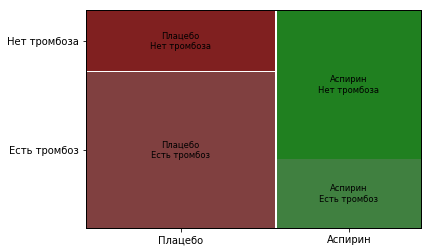

         Есть тромбоз  Нет тромбоза
Плацебо            18             7
Аспирин             6            13
           0          1
0  13.636364  10.363636
1  11.363636   8.636364


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

tab = pd.DataFrame({'Есть тромбоз': [18, 6], 'Нет тромбоза': [7, 13]}, index=('Плацебо', 'Аспирин'))
chi2, p_val, df, f_exp = chi2_contingency(tab.to_numpy())
mosaic(tab.stack())
plt.show()

print(tab)
print(pd.DataFrame(f_exp).T)

**Итого**
- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке  (только для R).
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения (только для R).

## Точный критерий Фишера

**Важно!** Если хотя бы в одной ячейке ожидаемое явление меньше 5, то для анализа должен использоваться точный критерий Фишера!

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2017.09.10.png" width="800px"/>

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-09-29%20в%2017.08.08.png" width="1000px"/>

In [28]:
from scipy.stats import fisher_exact
f_obs = [[1, 3], [3, 1]]

# odds_ratio - отношение шансов
odds_ratio, p_val = fisher_exact(f_obs)
print('odds_ratio: ', odds_ratio)
print('p_val: ', p_val)  

odds_ratio:  0.1111111111111111
p_val:  0.48571428571428527


# Практические задачи

Напишите функцию smart_test, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций.

Функция должна проверять гипотезу о независимости этих двух переменных при помощи критерия хи - квадрат или точного критерия Фишера.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, функция должна рассчитывать точный критерий Фишера и
возвращать вектор из одного элемента: получившегося p - уровня значимости.

Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять критерий
хи-квадрат и возвращать вектор из трех элементов: значение хи-квадрат, число степеней свободы, p-уровня значимости.

In [29]:
import pandas as pd
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency


def smart_test(data_frame):
    if data_frame.to_numpy().min() < 5:
        _, p_val = fisher_exact(data_frame)
        return p_val
    else:
        chi2, p_val, df, _ = chi2_contingency(data_frame)
        return chi2, df, p_val


table = pd.DataFrame({'1': [8, 2], '2':[6, 4]})
print(smart_test(table))

0.6284829721362221


In [30]:
# Решение с расчетом точного критерия Фишера для таблиц более 2x2 (более двух градаций)
import numpy as np
from scipy.stats import chi2_contingency
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
stats = importr('stats')


In [36]:
# Не забудь запустить предыдущую ячейку
data = np.array(np.random.randint(4,10,size=(2,5)))
print(data)


def smart_test (data):
    if data.min()<5:
        res = stats.fisher_test(data)
        return ('p-value: {}'.format(res[0][0]))
    else:
        kf, p_val, df, arr = chi2_contingency(data)
        return (kf, df, p_val)


print(smart_test(data))

[[4 4 5 8 7]
 [8 4 7 8 8]]
p-value: 0.9263867105653227


Почувствуй себя биоинформатиком!  Вся наследственная информация в живых организмах хранится внутри молекулы ДНК. Эта молекула состоит из последовательности четырех "букв" — ﻿A, T, G и C. 

Напишите функцию most_significant, которая получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность. 

Cкачайте тестовый набор данных (смотри ниже), чтобы познакомиться с их структурой, на которых будет тестироваться ваша функция. Рассмотрим пример, всего-лишь с несколькими наблюдениями, чтобы прояснить суть задачи:

```
 V1 V2 V3
1  A  A  C
2  G  G  A
3  C  C  C
4  T  T  A
5  G  T  T
6  T  A  G
```
В этом примере три последовательности  V1 , V2, V3. 
Для каждой переменной мы можем проверить нулевую гипотезу о том, что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости каждого нуклеотида отличается от равномерного.

Функция должна возвращать вектор с ﻿названием переменной (или переменных), в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном распределении нуклеотидов при помощи критерия хи - квадрат.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare

In [3]:
data = pd.DataFrame([np.random.binomial(3, 0.5, np.random.randint(5, 15)) for _ in range(np.random.randint(2, 20))])
data.index = ['v' + str(i + 1) for i in range(len(data))]

p_val_result, number = 1, 0
for i in range(len(data)):
    p_val = chisquare(data.iloc[i])[1]
    if p_val < p_val_result:
        p_val_result = p_val
        number = i

print(p_val_result)
print(data.index[number])

0.9697553905034445
v7


In [4]:
df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_data.csv')


def most_significant(data):
    p_val_res, name = 1, ''
    # enumerate позволяет получить индекс и значение элемента. Например, 0 и v1
    for _, col in enumerate(data.columns):
        # value_counts считаем количество значений, возвращает таблицу с названием значения и кол-вом.
        counts = data[col].value_counts()
        p_val = chisquare(counts)[1]
        if p_val < p_val_res:
            p_val_res = p_val
            name = col
    return (p_val_res, name)


print(most_significant(df))

(0.2762263279405305, 'V3')


In [5]:
# Генератор
# random.choice случайным способом выбирает из значений 'A', 'T', 'G', 'C', size — количество элементов,
# p — вероятность того, что выпадет значение.
# for _ in range(np.random.randint(2, 20)) цикл создает последовательности в кол-ве от 2 до 20 в случайном порядке
df = pd.DataFrame([np.random.choice(['A', 'T', 'G', 'C'], size=np.random.randint(20, 50), p=[0.23, 0.27, 0.25, 0.25])
                   for _ in range(np.random.randint(2, 20))])
df.index = ['v' + str(i + 1) for i in range(len(df))]


def most_significant(data):
    p_val_res, name = 1, ''
    # iterrows позволяет получить название и значения строки в таблице.
    for row_name, row_data in df.iterrows():
        counts = data.loc[row_name].value_counts()
        p_val = chisquare(counts)[1]
        if p_val < p_val_res:
            p_val_res = p_val
            name = row_name
    return (p_val_res, name)


print(most_significant(df))

(0.23945112055144263, 'v1')


В лекциях я говорил, что иногда возникает необходимость перекодировать количественную переменную в номинативную. Однако зачастую мы можем создавать новую номинативную переменную, комбинируя значения нескольких количественных переменных. 

Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). Переменная должна принимать значение Yes, если для данного цветка значения хотя бы трех количественных переменных выше среднего. В противном случае переменная important_cases  будет принимать значение No.

Формат ответа: в поле для ответа напишите скрипт, который создает новую переменную - фактор в данных iris.


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

table = pd.DataFrame(data=iris.data, columns=iris.feature_names)
important_cases = np.array([])
table.mean()

for _, row_data in table.iterrows():
    cnt = 0
    if row_data[0] > table.mean()[0]:
        cnt += 1
    if row_data[1] > table.mean()[1]:
        cnt += 1
    if row_data[2] > table.mean()[2]:
        cnt += 1
    if row_data[3] > table.mean()[3]:
        cnt += 1
    if cnt >= 3:
        important_cases = np.append(important_cases, 'Yes')
    else:
        important_cases = np.append(important_cases, 'No')


unique, counts = np.unique(important_cases, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['No' '81']
 ['Yes' '69']]


Обобщим предыдущую задачу! Напишем функцию get_important_cases, которая принимает на вход dataframe с произвольным числом количественных переменных (гарантируется хотя бы две переменные). Функция должна возвращать dataframe с новой переменной - фактором important_cases.

Переменная  important_cases принимает значение Yes, если для данного наблюдения больше половины количественных переменных имеют значения больше среднего. В противном случае переменная important_cases принимает значение No.

Переменная  important_cases - фактор с двумя уровнями 0 - "No", 1  - "Yes".  То есть даже если в каком-то из тестов все наблюдения получили значения "No", фактор должен иметь две градации. 

In [8]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
table = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [9]:
def get_important_cases(df):
    # shape возвращает размер таблицы, кол-во строк, кол-во колонок. df.shape[1] вернет количество колонок
    half_var = df.shape[1] / 2
    # Функция создает таблицу comparisons. Логика работы:
    # Значения в таблице df построчно сравниваются со средним по колонке.
    # Если больше, то True, иначе False
    # sum суммирует кол-во True, сумма записывается в ячейку
    comparisons = (df > df.mean()).sum(axis=1)
    # Добавляем в таблицу колонку 'important_cases', заполняем по умолчанию No
    df['important_cases'] = 'No'
    # Построчно сравниваем кол-во в comparisons с кол-вом в half_var
    # Если больше, то в колонке "important_cases" проставляем значение "Yes"
    df.loc[comparisons > half_var, "important_cases"] = "Yes"
    return df


print(get_important_cases(table))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    important_cases  
0    

In [ ]:
# Пошаговый пример. Отличие в промежуточной таблице comparisons
comparisons = (table > table.mean())
print(comparisons)
comparisons['sum'] = comparisons.sum(axis=1)
print(comparisons)

В R мы без труда можем рассчитать среднее и медиану вектора, а вот встроенной функции для расчета моды — наиболее часто встречаемого значения — в R нет! А мода так бы пригодилась нам при анализе номинативных данных! При этом функция mode в R существует, но выполняет абсолютно другую задачу (если хотите узнать, какую именно, ознакомьтесь со справкой: наберите в консоли ?mode).

Напишите функцию stat_mode, которая получает на вход вектор из чисел произвольной длины и возвращает числовой вектор с наиболее часто встречаемым значением. Если наиболее часто встречаемых значений несколько, функция должна возвращать несколько значений моды  в виде числового вектора. 



In [12]:
import numpy as np
import pandas as pd

pd.DataFrame(np.array([1, 2, 2, 3, 4, 4, 4, 2])).mode()

,0
0,2
1,4


Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения. 

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Для расчета стандартизированных остатков вы можете воспользоваться уже знакомой вам функцией chisq.test(). Изучите справку по этой функции, чтобы найти, где хранятся стандартизированные остатки.

## Остатки Пирсона

После подгонки линейной модели к данным проверяют адекватность соответствующей модели, для чего вычисляются различные остатки.

<a href="http://statistica.ru/glossary/general/ostatki-pirsona/">Остатки Пирсона</a> вычисляются как исходные остатки регрессии, деленные на корень из дисперсии.

## Стандартизованные остатки

<a href="http://statistica.ru/glossary/general/standartizovannye-ostatki/">Стандартизованные остатки</a> вычисляются как остатки регрессии, деленные на оцененное стандартное отклонение остатков.


Полезная статья: https://www.statology.org/standardized-residuals-python/

Еще одна: https://www.codecamp.ru/blog/standardized-residuals-excel/

И еще про statsmodels.api: https://runebook.dev/en/docs/statsmodels/contingency_tables


In [13]:
import pandas as pd
import statsmodels.api as sm


df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_drugs.csv')
print(df)
# Посчитаем количество позитивных и негативных исходов в зависимости от типа лекарства
df = df.value_counts().to_frame(name='Count')
# Преобразуем таблицу в таблицу сопряженности, где колонки тип лекарства, строки исход
df = df.pivot_table(values='Count', index='Result', columns='Drugs')
print(df)
# Преобразуем таблицу в массив, чтобы воспользоваться функцией sm.stats.Table
df1 = df.to_numpy()
table = sm.stats.Table(df1)
# Посчитаем остатки
residuals = table.standardized_resids
# Преобразуем массив в таблицу сопряженности
residuals = pd.DataFrame(residuals, index=['negative', 'positive'], columns=['drug_1', 'drug_2', 'drug_3'])

x, y = 0, 0
# С помощью цикла найдем максимальное значение в таблице.
# Найдем название строки с макс. значением.
# Найдем индекс колонки с макс. значением.
max_value = residuals.min().min()
for row_name, row_data in residuals.iterrows():
    for i in range(len(row_data)):
        if row_data[i] > max_value:
            max_value = row_data[i]
            x = row_name
            y = i
print(residuals.columns[y], x, round(max_value, 2))


      Drugs    Result
0    drug_3  positive
1    drug_1  negative
2    drug_1  negative
3    drug_2  positive
4    drug_1  negative
..      ...       ...
390  drug_3  positive
391  drug_3  positive
392  drug_2  negative
393  drug_1  negative
394  drug_2  negative

[395 rows x 2 columns]
Drugs     drug_1  drug_2  drug_3
Result                          
negative      31      84      55
positive      61      98      66
drug_1 positive 2.07


In [2]:
import pandas as pd
import statsmodels.api as sm
df_read = pd.read_csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")


def max_resid(df):
    # Что происходит пошагово:
    # from_data(df[['Result', 'Drugs']]) создает таблицу сопряженности из dataframe, где колонки это Drugs,
    # а строки Result (исход)
    # standardized_resids считает стандартные остатки
    # В итоге мы получаем таблицу с остатками, сохранив название колонок и строк
    residuals = sm.stats.Table.from_data(df[['Result', 'Drugs']]).standardized_resids
    # Находим максимальное значение в таблице
    max_val = residuals.max().max()
    # Удаляем значения в таблице, которые не равны max_val, в результате получаем таблицу 1 x 1
    max_res = residuals[residuals == max_val].dropna(axis=1, how="all").dropna()
    return max_res.index[0], max_res.columns[0], round(max_val, 2)


max_resid(df_read)

('positive', 'drug_1', 2.07)

<hr>

# Часть 2 Логистическая регрессия и непараметрические методы 

## Логистическая регрессия

In [3]:
# Логистическая регрессия - метод, который позволяет исследовать взаимосвязи между
# номинативной зависимой переменной (ЗП) и различными предикторами.

# Уравнение логистической регрессии:

\begin{equation}
log(odds) = B_0 + B_1 x_1 + B_2 x_2 + ... + B_k x_k
\end{equation}

In [ ]:
# log - натуральный логарифм.
# odds - шансы положительного исхода (далее просто "шансы").

\begin{equation}
p = \frac{e^{log(odds)}}{1 + e^{log(odds)}} = \frac{exp(log(odds))}{1 + exp(log(odds))}
\end{equation}

In [4]:
# p - вероятность положительного исхода (далее просто "вероятность").

**Есть нюанс!** Номинативная переменная принимает значение 0 и 1, как же нам использовать формулу линейной регрессии
\begin{equation}
p_i = B_0 + B_1 x_1 + B_2 x_2 + ... + B_i x_i
\end{equation}

Давайте решим эту проблему, на примере монетки

## Шансы и вероятность

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
# Разберем на примере подбрасывания монетки. Пусть у нас было 10 бросков и мы получили следующие результаты:
# 1 - орел (в примере мы хотим, чтобы выпадали орлы, это будет положительный исход)
# 0 - решка (отрицательный исход)

df = pd.DataFrame({'coin_state': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]})
df

,coin_state
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [7]:
# 2 орла, 8 решек
df.coin_state.value_counts()

0    8
1    2
Name: coin_state, dtype: int64

In [8]:
# Рассчитаем вероятность:

\begin{equation}
p = \frac{pos}{pos + neg}
\end{equation}  

In [9]:
pos = df.coin_state.value_counts()[1]   # количество положительных исходов
neg = df.coin_state.value_counts()[0]   # количество отрицательных исходов

p = pos / (pos + neg)
p

0.2

In [10]:
# Рассчитаем шансы:

\begin{equation}
odds = \frac{pos}{neg}
\end{equation}

In [11]:
odds = pos / neg
odds

0.25

In [12]:
# Шансы можно посчитать, зная вероятность:

\begin{equation}
odds = \frac{p}{1 - p}
\end{equation}

In [13]:
p / (1 - p)

0.25

In [14]:
# Вероятность можно посчитать, зная шансы:

\begin{equation}
p = \frac{odds}{1 + odds}
\end{equation}

In [15]:
odds / (1 + odds)

0.2

## При чем тут натуральный логарифм?

In [ ]:
# Проследим за различным соотношением положительных и отрицательных исходов
# и рассчитанными на их основе вероятностью, шансами и натуральным логарифмом шансов (далее просто "логарифм шансов").

# Вероятность     - число от нуля до единицы
# Шансы           - число от нуля до плюс бесконечности
# Логарифм шансов - число от минус бесконечности до плюс бесконечности

In [ ]:
pd.DataFrame({
    'pos': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'neg': [10, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0],
    'p': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'odds': [0, 0.11, 0.25, 0.43, 0.66, 1, 1.5, 2.33, 4, 9, np.nan],
    'log(odds)': [np.nan, -2.2, -1.39, -0.85, -0.41, 0, 0.41, 0.85, 1.39, 2.2, np.nan],
})

,pos,neg,p,odds,log(odds)
0,0,10,0.0,0.00,NaN
1,1,0,0.1,0.11,-2.20
2,2,8,0.2,0.25,-1.39
3,3,7,0.3,0.43,-0.85
4,4,6,0.4,0.66,-0.41
5,5,5,0.5,1.00,0.00
6,6,4,0.6,1.50,0.41
7,7,3,0.7,2.33,0.85
8,8,2,0.8,4.00,1.39
9,9,1,0.9,9.00,2.20


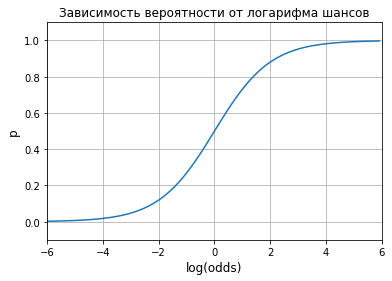

In [ ]:
# Вспомним уравнение логистической регрессии - в правой части число от минус бесконечности до плюс бесконечности,
# в левой - логарифм шансов, зная который, мы можем рассчитать вероятность.

# Визуализируем зависимость вероятности от логарифма шансов:

log_odds = np.arange(-6, 6, 0.1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))

plt.plot(log_odds, p)
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности от логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()
plt.close()

## Практические задачи

Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?

Чтобы не запутаться, давайте в этом задании рассматривать как "успех" - выпадение решки.

In [16]:
from math import log

In [17]:
positive = 30
negative = 70
p = positive / (positive + negative)
p

0.3

In [18]:
odds = p / (1 - p)
odds

0.4285714285714286

In [19]:
log_odds = log(odds)
log_odds

-0.8472978603872036

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:

Укажите число с точностью хотя бы до двух значащих цифр.

In [20]:
import numpy as np

In [22]:
log_odds = -1
odds = np.exp(log_odds)
p = odds / (1 + odds)
p

0.2689414213699951

Вернемся к уже знакомым нам данным.

<img src='https://ucarecdn.com/37e900e5-2477-4354-b877-ceba2b088562/' />

Рассчитайте логарифм шанса, того что случайно выбранный человек из нашей выборки окажется биологом.




In [23]:
positive = 24
negative = 17
p = positive / (positive + negative)
odds = p / (1 - p)
log_odds = log(odds)
log_odds

0.3448404862917294

## Модель без предикторов. Intercept only model

In [24]:
# Датасет Титаника

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов (шансов выжить)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Tue, 08 Jun 2021   Deviance:                       964.52
Time:                        20:53:33   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-10-03%20в%2015.35.41.png" width="800px"/>

In [ ]:
# Получаем модель:
# log(odds) = -0.3799

In [ ]:
# Распределение частот ЗП
df.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

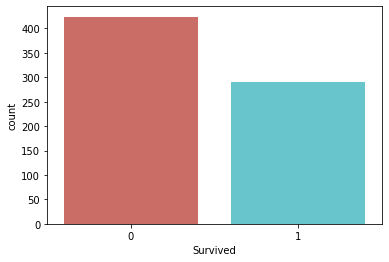

In [ ]:
sns.countplot(x='Survived', data=df, palette='hls')

In [ ]:
# df.Survived.value_counts()[1] - количество выживших 290
# df.Survived.value_counts()[0] - количество погибших 424
odds = df.Survived.value_counts()[1] / df.Survived.value_counts()[0]
odds

0.6839622641509434

In [ ]:
# Логарифм шансов - это и есть Intercept.
log_odds = np.log(odds)
log_odds

-0.37985253225143806

In [ ]:
# Рассчитаем шансы:
odds = np.exp(log_odds)
odds

0.6839622641509434

In [ ]:
# Рассчитаем вероятность:
p = odds / (1 + odds)
p

0.4061624649859944

In [ ]:
# aic - показатель остатков модели.
# Чем он ниже, тем лучше модель (по аналогии с суммой квадратов остатков в линейной регрессии).
glm_binomial.aic

966.5159648555248

## Модель с одним номинативным предиктором

In [ ]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept      - логарифм шансов для женщин
# C(Sex)[T.male] - логарифм отношения шансов для мужчин к шансам для женщин. Иными словами это цена перехода с одной градации нашего признака на другую.
# Шансы для мужчин Intercept + C(Sex)[T.male]

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Tue, 08 Jun 2021   Deviance:                       750.70
Time:                        20:53:34   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1243      0.144      7.814      0.000       0.842       1.406
C(Sex)[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==================================================================================
"""

In [ ]:
# Таблица сопряженности между переменными выжил/не выжил и пол
cross_table = pd.crosstab(df.Survived, df.Sex)
cross_table

Sex,female,male
Survived,,
0,64,360
1,197,93


Text(0, 0.5, 'Количество')

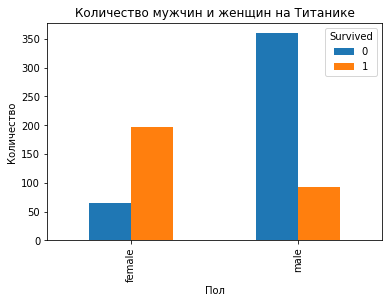

In [ ]:
# Визуализировать таблицу сопряженности можно так:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.title('Количество мужчин и женщин на Титанике')
plt.xlabel('Пол')
plt.ylabel('Количество')

In [ ]:
# cross_table.female[0] - количество погибших женщин
# cross_table.female[1] - количество выживших женщин
odds_female = cross_table.female[1] / cross_table.female[0]
odds_female

3.078125

In [ ]:
# Логарифм шансов для женщин - это и есть Intercept
np.log(odds_female)

1.1243206453783166

In [ ]:
# cross_table.male[0] - количество погибших мужчин
# cross_table.male[1] - количество выживших мужчин
odds_male = cross_table.male[1] / cross_table.male[0]
odds_male

0.25833333333333336

In [ ]:
odds_ratio = odds_male / odds_female
odds_ratio

0.08392554991539763

In [ ]:
np.log(odds_ratio)
# Логарифм отношения шансов для мужчин к шансам для женщин - это и есть значение C(Sex)[T.male]

-2.4778251836752165

In [ ]:
# Получаем модель:
# log(odds) = 1.1243 + (-2.4778 * Sex_male)

# Если предсказываем логарифм шансов для женщин (Sex_male = 0):
# log(odds) = 1.1243 + (-2.4778 * 0)
# log(odds) = 1.1243

# Если предсказываем логарифм шансов для мужчин (Sex_male = 1):
# log(odds) = 1.1243 + (-2.4778 * 1)
# log(odds) = 1.1243 - 2.4778
# log(odds) -1.3535

log_odds_male = 1.1243 - 2.4778
log_odds_male

-1.3534999999999997

In [ ]:
# aic у этой модели ниже, чем у предыдущей, значит эта модель лучше.
glm_binomial.aic

754.7002061466517

## Практические задачи

Каждый из аспирантов проводил исследование взаимосвязи результатов лечение (положительные или отрицательные) и типа лекарства (лекарство_1 и лекарство_2). 

Каждый аспирант прислал мозаичный график и значения экспоненты коэффициентов регрессии, которая предсказывала исход лечения, основываясь на типе лекарства (Result ~ Drugs). Соотнесите графики и значения экспоненты коэффициентов логистической регрессии. 


<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Снимок%20экрана%202022-10-03%20в%2017.14.56.png" width="600px"/>

Intercept - это шансы (**не логарифм шансов**) положительного исхода Drug1, то есть Positive/Negative для Drug1. 
Когда Positive < Negative  эти шансы  <1 , когда Positive = Negative  интерсепт =1 .

DrugDrug2 - это отношение шансов oddsDrug1/oddsDrug2. 

Для  PositiveDrug1 = PositiveDrug2, отношение шансов =1, PositiveDrug1 > PositiveDrug2, отношение шансов >1, PositiveDrug1 < PositiveDrug2, отношение шансов <1



## Модель с двумя номинативными предикторами

In [ ]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex) * C(Pclass)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept      - логарифм шансов для Ж в 1кл
# C(Sex)[T.male] - логарифм отношения шансов для М в 1кл к шансам Ж в 1кл
# C(Pclass)[T.2] - логарифм отношения шансов для Ж во 2кл к шансам Ж в 1кл
# C(Pclass)[T.3] - логарифм отношения шансов для Ж в 3кл к шансам Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.2] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 2кл и М/Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.3] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 3кл и М/Ж в 1кл

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.14
Date:                Tue, 08 Jun 2021   Deviance:                       642.28
Time:                        20:53:34   Pearson chi2:                     714.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.3081      0.588      5.628      0.000       2.156       4.460
C(Sex)[T.male]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                   -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                   -3.4653      0.620     -5.585      0.000      -4.681      -2.249
C(Sex)[T.male]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
C(Sex)[T.male]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
=================================================================================================
"""

In [ ]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для женщин.
cross_table_female = pd.crosstab(df[df.Sex == 'female'].Survived, df.Pclass)
cross_table_female

Pclass,1,2,3
Survived,,,
0,3,6,55
1,82,68,47


Text(0, 0.5, 'Количество')

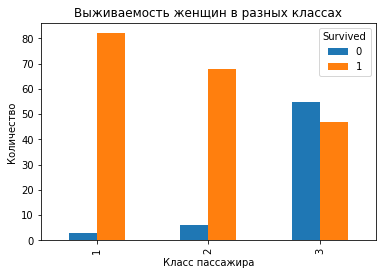

In [ ]:
pd.crosstab(df.Pclass[df.Sex == 'female'], df.Survived).plot(kind='bar')
plt.title('Выживаемость женщин в разных классах')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')

In [ ]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для мужчин.
cross_table_male = pd.crosstab(df[df.Sex == 'male'].Survived, df.Pclass)
cross_table_male

Pclass,1,2,3
Survived,,,
0,61,84,215
1,40,15,38


Text(0, 0.5, 'Количество')

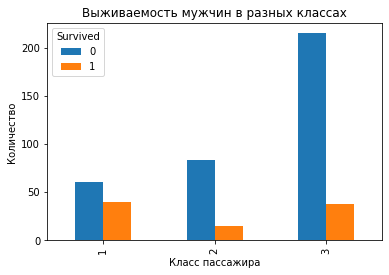

In [ ]:
pd.crosstab(df.Pclass[df.Sex == 'male'], df.Survived).plot(kind='bar')
plt.title('Выживаемость мужчин в разных классах')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')

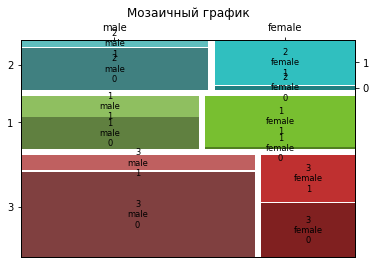

In [ ]:
# График сопряженности между классом пассажира, полом и переменной выжил/не выжил.

from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Pclass', 'Sex', 'Survived'], title='Мозаичный график', horizontal=0, gap=0.03)
plt.show()

In [ ]:
odds_female_pc1 = cross_table_female[1][1] / cross_table_female[1][0]
odds_female_pc1

27.333333333333332

In [ ]:
np.log(odds_female_pc1)
# Это значение Intercept

3.3081069585961433

In [ ]:
odds_male_pc1 = cross_table_male[1][1] / cross_table_male[1][0]
odds_male_pc1

0.6557377049180327

In [ ]:
np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]

-3.7301013686555184

In [ ]:
odds_female_pc2 = cross_table_female[2][1] / cross_table_female[2][0]
odds_female_pc2

11.333333333333334

In [ ]:
np.log(odds_female_pc2 / odds_female_pc1)
# Это значение C(Pclass)[T.2]

-0.8803587226480917

In [ ]:
odds_female_pc3 = cross_table_female[3][1] / cross_table_female[3][0]
odds_female_pc3

0.8545454545454545

In [ ]:
np.log(odds_female_pc3 / odds_female_pc1)
# Это значение C(Pclass)[T.3]

-3.4652925421185556

## Взаимодействие номинативных предикторов

In [ ]:
odds_male_pc2 = cross_table_male[2][1] / cross_table_male[2][0]
odds_male_pc2

0.17857142857142858

In [ ]:
np.log(odds_male_pc2 / odds_female_pc2) - np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]:C(Pclass)[T.2]

-0.42041346503363686

In [ ]:
odds_male_pc3 = cross_table_male[3][1] / cross_table_male[3][0]
odds_male_pc3

0.17674418604651163

In [ ]:
np.log(odds_male_pc3 / odds_female_pc3) - np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]:C(Pclass)[T.3]

2.154235083776654

In [ ]:
# Получаем модель:
# log(odds) = 3.3081 + (-3.7301 * Sex_male) + (-0.8804 * Pclass2) + (-3.4653 * Pclass3) + (-0.4204 * Sex_male * Pclass2) + (2.1542 * Sex_male * Pclass3)

# Если предсказываем логарифм шансов для Ж в 1кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 0 * 0) + (2.1542 * 0 * 0)
# log(odds) = 3.3081

# Если предсказываем логарифм шансов для М в 1кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 1 * 0) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301
# log(odds) = -0.422

log_odds_male = 3.3081 - 3.7301
log_odds_male

-0.42200000000000015

In [ ]:
# Если предсказываем логарифм шансов для Ж во 2кл (Sex_male = 0, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 0 * 1) + (2.1542 * 0 * 0)
# log(odds) = 3.3081 - 0.8804
# log(odds) = 2.4277

log_odds_female_pc2 = 3.3081 - 0.8804
log_odds_female_pc2

2.4277

In [ ]:
# Если предсказываем логарифм шансов для Ж в 3кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 0 * 0) + (2.1542 * 0 * 1)
# log(odds) = 3.3081 - 3.4653
# log(odds) = -0.1572

log_odds_female_pc3 = 3.3081 - 3.4653
log_odds_female_pc3

-0.1572

In [ ]:
# Если предсказываем логарифм шансов для М во 2кл (Sex_male = 1, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 1 * 1) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301 - 0.8804 - 0.4204
# log(odds) = -1.7228

log_odds_male_pc2 = 3.3081 - 3.7301 - 0.8804 - 0.4204
log_odds_male_pc2

-1.7227999999999999

In [ ]:
# Если предсказываем логарифм шансов для М в 3кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 1 * 0) + (2.1542 * 1 * 1)
# log(odds) = 3.3081 - 3.7301 - 3.4653 + 2.1542
# log(odds) = -1.7331

log_odds_male_pc3 = 3.3081 - 3.7301 - 3.4653 + 2.1542
log_odds_male_pc3

-1.7331000000000003

In [ ]:
# aic у этой модели ниже, чем у двух предыдущих, значит эта модель лучше.
glm_binomial.aic

654.2750443468178

## Практическая задача
<img src="https://ucarecdn.com/c52675f3-79b6-44b6-a51e-a3fbd9f8683f/"/>

Female(1, 0), Male(1, 0), None(1, 0), Placebo(1, 0), Treatment(1, 0)

Intercept + 0.80 * SexMale + B2 * ConditionPlacebo + B3 * ConditionTreatment + B4 * SexMale:ConditionPlacebo + B5 * SexMale:ConditionTreatment

- Intercept — шанс вылечится женщинам, которые ничего не принимали.
- SexMale — отношение шансов вылечится мужчине к шансам женщине, которые ничего не принимали.
- ConditionPlacebo — отношение шансов вылечится у женщин, которые ничего не принимали к шансам женщин, которые принимали плацебо.
- ConditionTreatment — отношение шансов вылечится у женщин, которые ничего не принимали к шансам женщин, которые принимали лекарство.
- SexMale:ConditionPlacebo — разность отношения шансов, рассчитанных для отношения мужчин/женщин, которые принимали плацебо к м/ж,
которые ничего не принимали.
- SexMale:ConditionTreatment — разность отношения шансов, рассчитанных для отношения мужчин/женщин, которые принимали лекарство к м/ж,
которые ничего не принимали.

(Intercept), ConditionPlacebo, ConditionTreatment, SexMale:ConditionPlacebo, SexMale:ConditionTreatment

0.82, 2.13, -1.15, -0.17, 16.11

SexMale = 0.80


Intercept = -1.15

ConditionPlacebo = 0.82

ConditionTreatment = 2.13

SexMale_ConditionPlacebo = 16.11

SexMale_ConditionTreatment = -0.17

## Логика решения
Intercept. Вероятность вылечится примерно 20%,  что равно логарифму -1.15

ConditionPlacebo. Судя по площади вероятность ~ 30%, считаем odds_female_placebo, дальше log, дальше  exp(-1.15) / exp(-0.95).
Получается 0.82

ConditionTreatment. Вероятность ~ 80%. Значит соотношение должно принимать положительное значение. Из положительных значений остались:
2.13 и с. Второе слишком большое, значит ConditionTreatment = 2.13

SexMale_ConditionPlacebo. Очень значительная степень положительных исходов в группе с плацебо. Значит разность будет существенной и положительной:

SexMale_ConditionPlacebo = 16.11

SexMale_ConditionTreatment. По остаточному принципу = -0.17

In [1]:
# После того как вы восстановили формулу регрессии в предыдущем примере, рассчитайте с её помощью вероятность снять головную боль
# после приёма настоящего лекарства мужчиной.

# Получаем модель
# log(odds) = -1.15 + (0.80 * SexMale) + (0.82 * ConditionPlacebo) + (2.13 * ConditionTreatment) + (16.11 * SexMale * ConditionPlacebo) + (-0.17 * SexMale * ConditionTreatment)

In [2]:
import numpy as np
log_odds = -1.15 + (0.80 * 1) + (0.82 * 0) + (2.13 * 1) + (16.11 * 1 * 0) + (-0.17 * 1 * 1)
print(log_odds)
odds = np.exp(log_odds)
print(odds)
p = odds / (1 + odds)
print(p)

1.61
5.002811227833588
0.8334113864245404


## Комбинация предикторов разного типа

In [ ]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex) + C(Pclass) + Age', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов для Ж в 1кл при условии, что их возраст равен нулю.
# Age - коэффициент при возрасте показывает,
# на сколько изменяется логарифм шансов для базового уровня при единичном изменении возраста.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Tue, 08 Jun 2021   Deviance:                       647.28
Time:                        20:53:35   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

In [ ]:
# Получаем модель:
# log(odds) = 3.7770 - (2.5228 * Sex_male) - (1.3098 * Pclass2) - (2.5806 * Pclass3) - (0.0370 * Age)

# Если предсказываем логарифм шансов для Ж в 1кл в возрасте 20 лет:
# log(odds) = 3.7770 - (2.5228 * 0) - (1.3098 * 0) - (2.5806 * 0) - (0.0370 * 20)
# log(odds) = 3.7770 - (0.0370 * 20)
# log(odds) = 3.037

3.7770 - (0.0370 * 20)

3.037

In [ ]:
# Кстати, модель без учета возраста была лучше.
glm_binomial.aic

657.2831255018241

## Практическая задача

Говорят, эту задачу может решить только Чак Норрис, но попытка не пытка! На графиках изображены предсказания разных логистических моделей. По оси Y - предсказания модели, по оси X - номера наблюдений, для которых были сделаны предсказания. Определите, какой модели соответствует каждый из графиков.
<img src="https://ucarecdn.com/918d7413-28c9-48b2-91f6-c0144952c4ae/"/>
A - Один номинативный и один количественный предиктор

B - Два номинативных предиктора с взаимодействием

C - Один количественный предиктор

D - Два номинативных предиктора без взаимодействия

E - Intercept-only модель

F - Один номинативный предиктор

**Логика решения**

Красные точки это пешеходы(30 человек) прошедшие через дорогу за 2 часа .
Делал методом исключения:
- Intercept-only модель: зависимая переменная имеющая 2 градации(Пример: только Мужчина "ИЛИ" только Женщина) ==> Прошли только женщины(30 чел.) за 2 часа.
- 1 ном. пред.: имеет 2-е градации (Пример: М. или Ж.) ==> 15 Муж. прошли за 1-й час, 15 Жен.  прошли за 2-й час;
- 1 коли. пред.: это Муж. Жен. Дети и т.д. ==> Через дорогу за 2 часа прошло 30 чел. все кому не попадя - сплошной хаус  :); 
- 1 номин. 1 колич. пред.: Остался только 3 графика  ==> 15 чел. хаоса 1-й час и 15 чел хаоса 2-й час.   
Когда 4 известно ==>  дальше можно поиграться :)
- 2 номин. пред. с взаимодействием: Идут 15 Муж. и  15 Жен. ==> У мужчин шаг широкий 1-й час и женщин узкий 2-й час.
- 2 номин. пред. без взаимодействия: Идут 15 Муж. и 15 Жен.==> У мужчин 1-й час и женщин 2- й час шаг одинаковый.





## Когда нужно использовать непараметрические методы и почему?

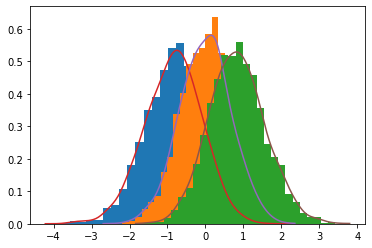

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


def get_gaussian_density(dataset):

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density


mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины

# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)

# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')

# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)

plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))

plt.show()

## Непараметрические методы. Продолжение.
**Манн-Уитни**

Самым популярным непараметрическим критерием для сравнения двух групп является U-критерий Манна — Уитни. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает сумму рангов (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

Затем для каждой из выборок рассчитывается показатель:

$$U_1 = R_1-\frac{n_1*(n_1+1)}{2}$$
$$U_2 = R_2-\frac{n_2*(n_2+1)}{2}$$

Где R1 и R2 - это сумма рангов в двух группах, а n1 и n2 - число наблюдений.

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где 
$$μ = \frac{n_1 * n_2}{2}$$


$$σ = \sqrt{\frac{n_1*n_2*(n_1 + n_2 + 1)}{12}}$$
  

что и позволяет нам рассчитать вероятность получить наблюдаемые или еще более выраженные различия суммы рангов.

Разумно применять вместо t - теста: 

- Распределения хотя бы в одной из выборок значительно отличается от нормального. 
- Есть заметные выбросы в данных. 
- В некоторых задачах мощность теста даже выше, чем t критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении). 

Неразумно применять: 

Выборки разного размера, с различным направлением асимметрии.  

**Краскел-Уоллис**

https://baguzin.ru/wp/rangovyj-kriterij-kruskala-uollisa/

# Практические задачи

Напишите функцию get_coefficients, которая получает на вход dataframe с двумя переменными x ( фактор с произвольным числом градаций) и y ( фактор с двумя градациями). Функция строит логистическую модель, где y — зависимая переменная, а x — независимая, и возвращает вектор со значением экспоненты коэффициентов модели. 

In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sf
import statsmodels.api as sm
# Импортируем данные. Посмотрим, что они представляют
df = pd.read_csv('https://stepik.org/media/attachments/course/524/test_data_01.csv')
print(df.head())

# Пусть 1 — это отрицательный исход, а 2 положительный
# Выполним замену, чтобы формула в модели корректно рассчитала коэффициенты
df['y'] = np.where((df.y == 1), 0, df.y)
df['y'] = np.where((df.y == 2), 1, df.y)
print(df.head())


def get_coefficients(df):
    # Посчитаем коэффициенты, обрати внимание на формулу 'y ~ C(x)'
    logit_res = sf.glm('y ~ C(x)', df, family=sm.families.Binomial()).fit()
    logit_res.summary()
    #%%
    # Найдем экспоненты и преобразуем в список
    return np.exp(logit_res.params).to_list()


print(get_coefficients(df))

   x  y
0  1  1
1  3  1
2  1  1
3  1  2
4  2  2
   x  y
0  1  0
1  3  0
2  1  0
3  1  1
4  2  1
[0.9000000000000002, 2.5396825396800584, 0.6666666666666711]


Если в нашей модели есть количественные предикторы, то в интерцепте мы будем иметь значение, соответствующее базовому уровню категориальных предикторов и нулевому уровню количественных. Это не всегда осмысленно. 

Например, нам не интересен прогноз для людей нулевого возраста или роста. В таких ситуациях количественную переменную имеет смысл предварительно центрировать так, чтобы ноль являлся средним значением переменной. Самый простой способ центрировать переменную — отнять от каждого наблюдения среднее значение всех наблюдений.


В этом задании вашей задачей будет  написать функцию centered, которая получает на вход датафрейм и имена переменных, которые необходимо центрировать так, как это описано выше. Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными.

In [5]:
import pandas as pd
df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/cen_data.csv')


def centered(df):
    df = df - df.mean()
    return df


print(centered(df_r))

     X1   X2    X3    X4
0 -1.04 -1.2  0.94 -0.62
1 -1.44  1.9 -0.06  1.68
2  0.06 -3.5 -1.36  1.78
3  0.06  0.0 -2.06 -2.92
4  2.36  2.8  2.54  0.08


Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров. В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный) 
его массу (кг) - weight
длину (см) - length 
ширину (см) - width 
тип багажа (сумка или чемодан) - type.

Напишите функцию get_features , которая получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная являлся ли багаж запрещенным, а предикторы - остальные переменные, и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  "Prediction makes no sense".

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sf
import statsmodels.api as sm

df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/test_luggage_2.csv')
# Меняем значение No, Yes на 0, 1 в колонке is_prohibited
df_r['is_prohibited'] = np.where((df_r.is_prohibited == 'No'), 0, df_r.is_prohibited)
df_r['is_prohibited'] = np.where((df_r.is_prohibited == 'Yes'), 1, df_r.is_prohibited)


def get_features(df):
    # Извлекаем P-values из функции логистической регрессии. Пошагово, что происходит:
    # sf.glm() — создает модель логистической регрессии с биномиальным распределением,
    # без взаимодействия между факторами (формула: 'is_prohibited ~ type + weight + length + width')
    # .fit() модель ищет коэффициенты, которые минимизируют различия между предсказанием и реальными значениями
    # .pvalues извлекаем P-values из таблицы с результатами. Получаем Series.
    p_val = sf.glm('is_prohibited ~ type + weight + length + width', df, family=sm.families.Binomial()).fit().pvalues
    # Удаляем строку с Intercept
    p_val = p_val.drop(labels='Intercept')
    # Переименовываем остальные строки
    p_val.index = ['type', 'weight', 'length', 'width']

    row_names = []
    row_names += [row_name for row_name, row_data in p_val.iteritems() if row_data < 0.05]
    return row_names if len(row_names) else 'Prediction makes no sense'


print(get_features(df_r))

['type', 'weight']


### Постановка задачи
Продолжим нашу работу в службе безопасности. Разобравшись с тем, какие предикторы могут помогать нам предсказывать запрещенный багаж, давайте применим наши знания для повышения безопасности в аэропорту. Обучим наш алгоритм различать запрещенный и разрешенный багаж на уже имеющихся данных и применим его для сканирования нового багажа.

Напишите функцию, которая принимает на вход два набора данных. Первый dataframe содержит информацию об уже осмотренном багаже (запрещенный или нет, вес, длина, ширина, тип сумки).

Второй набор данных — это информация о новом багаже, который сканируется прямо сейчас. В данных также есть информация: вес, длина, ширина, тип сумки и имя пассажира (смотри описание переменных в примере).

Используя первый набор данных, обучите регрессионную модель различать запрещенный и разрешенный багаж. При помощи полученной модели для каждого наблюдения в новых данных предскажите вероятность того, что багаж является запрещенным. Пассажиров, чей багаж получил максимальное значение вероятности, мы попросим пройти дополнительную проверку.

Итого, ваша функция принимает два набора данных и возвращает имя пассажира с наиболее подозрительным багажом. Если несколько пассажиров получили максимальное значение вероятности, то верните вектор с несколькими именами.

В этой задаче для предсказания будем использовать все предикторы, даже если некоторые из них оказались незначимыми. Для предсказания стройте модель без взаимодействия предикторов.


**Данные** 

Обучающий датасет: https://stepic.org/media/attachments/course/524/test_data_passangers.csv 

Датасет для предсказания: https://stepic.org/media/attachments/course/524/predict_passangers.csv

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sf
import statsmodels.api as sm

training_data_r = pd.read_csv('https://stepic.org/media/attachments/course/524/test_data_passangers.csv')
training_data_r.is_prohibited = training_data_r.is_prohibited.map({'Yes': 1, 'No': 0})

predict_data = pd.read_csv('https://stepic.org/media/attachments/course/524/predict_passangers.csv')
predict_data.type = predict_data.type.map({'Suitcase': 1, 'Bag': 0})


def most_suspicious(training_data, df_predict):
    # Извлекаем коэффициенты с помощью params
    coef = sf.glm('is_prohibited ~ type + weight + length + width', training_data,
                  family=sm.families.Binomial()).fit().params
    # Получаем модель:
    # log(odds) = -2.848451 + (-2.476006 * T.Suitcase) + (-0.057797 * weight) + (0.125409 * length) + (0.103319 * width)
    # Добавляем в таблицу колонку log_odds, которая заполнена значениями log(odds) по формуле выше
    df_predict['log_odds'] = coef[0] + (coef[1] * df_predict['type']) + (coef[2] * df_predict['weight']) + (coef[3]
                  * df_predict['length']) + (coef[4] * df_predict['width'])
    # Считаем шансы
    df_predict['odds'] = [np.exp(i) for i in df_predict['log_odds']]
    # Считаем вероятность
    df_predict['probability'] = df_predict['odds'] / (1 + df_predict['odds'])
    # Находим пассажиров
    passengers = [df_predict['passangers'][i] for i in range(len(df_predict['passangers']))
                  if df_predict['probability'][i] == df_predict['probability'].max()]
    return len(passengers) == 1 and passengers[0] or passengers


print(most_suspicious(training_data_r, predict_data))

Svetozar


In [2]:
import statsmodels.formula.api as sf
import statsmodels.api as sm
import pandas as pd
import numpy as np

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_passangers.csv')
data_for_predict = pd.read_csv(r'https://stepic.org/media/attachments/course/524/predict_passangers.csv')


def most_suspicious(test_data, data_for_predict):
    fit = sf.glm('is_prohibited ~ weight + width + length + type', test_data, family=sm.families.Binomial()).fit()
    # Как я понял, есть некий баг с statsmodels.formula, который меняет вероятность на противоположную
    # https://github.com/statsmodels/statsmodels/issues/2181
    # Поэтому инвертируем вероятности (либо можно вручную задать y перед fit)
    pred = 1 - fit.predict(data_for_predict)  # сразу возвращает вероятности.
    print(pred)
    passangers = data_for_predict.iloc[np.where(pred == pred.max())].passangers.to_list()
    return len(passangers) == 1 and passangers[0] or passangers


print(most_suspicious(data, data_for_predict))


0    0.376741
1    0.569988
2    0.831668
3    0.815395
4    0.357560
5    0.872381
6    0.111059
7    0.125034
8    0.178895
9    0.682180
dtype: float64
Svetozar


Напишите функцию normality_test, которая получает на вход dataframe с произвольным количеством переменных разных типов (количественные, строки, факторы) и проверяет нормальность распределения количественных переменных. Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной.

Вот такая задача уж точно встретится вам в реальной практике не один раз!

In [3]:
import pandas as pd
from scipy import stats
import numpy as np

df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')


def norm_test(df):
    df = df.select_dtypes(include=np.number)
    p_val = pd.DataFrame()
    for col_name, col_data in df.iteritems():
        p_val[col_name] = [stats.shapiro(col_data)[1]]
    return p_val


print(norm_test(df_r))

         V1        V3       V5        V6
0  0.568211  0.245834  0.31419  0.009374


In [6]:
def norm_test(df):
  df_n = df.select_dtypes(include=np.number)
  df_s = df_n.apply(stats.shapiro, axis=0) #.map(lambda x: round(x[1],3))
  return  df_s.iloc[1]


print(norm_test(df_r))

V1    0.568211
V3    0.245834
V5    0.314190
V6    0.009374
Name: 1, dtype: float64


Напишите функцию smart_anova, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, переменная y - фактор, ﻿разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы при помощи дисперсионного анализа и вернуть ﻿именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя ﻿бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте bartlett.test() p < 0.05.

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

# На вход мы получаем таблицу вида [[1.08, 'A'],[0.07, 'B'], [0.81, 'C']], которая требует преобразования
df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/s_anova_test.csv')
print(df_r.head())


def norm_test(df):
    df_s = np.apply_along_axis(shapiro, 0, df)[1]
    return df_s


def homog_test(df):
    ps = bartlett(*df.T)
    return round(ps[1], 3)


def kruskal_test(df):
    ps = kruskal(*df.T)
    return round(ps[1], 3)


def anova_test(df):
    ps = f_oneway(*df.T)
    return round(ps[1], 3)


def smart_anova(df):
    # Добавим колонку count, чтобы таблица приобрела вид
    # [[1.08, 'A', 0],[0.07, 'B', 0], [0.81, 'C', 0], [1.08, 'A', 1],[0.07, 'B', 1], [0.81, 'C', 1]]
    # cumcount накопительный счетчик
    df["count"] = df.groupby('y').cumcount()
    # преобразуем таблицу, а затем превратим ее в многомерный массив, чтобы с ней могли работать функции с тестами
    df = np.array(df.pivot(columns="y", values="x", index="count"))
    if ((norm_test(df) < 0.05).any()) or (homog_test(df) < 0.05):
        print("non-parametric")
        return {"KW": kruskal_test(df)}
    print("parametric")
    return {"ANOVA": anova_test(df)}


print(smart_anova(df_r))


      x  y
0  1.08  A
1  0.07  A
2 -1.02  A
3 -0.45  A
4  0.81  A
parametric
{'ANOVA': 0.265}


Напишите функцию normality_by, которая принимает на вход dataframe c тремя переменными. Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами применения теста ﻿ shapiro.test ﻿﻿(формат вывода смотри ниже).

Рассмотрим пример работы функции. В данных mtcars есть две группирующие переменные am и vs, и обе переменные имеют две градации 0 и 1. В результате получаем 4 группы:

```
am vs
1 1
1 0
0 1
0 0

```


Теперь для переменной mpg ﻿в каждой из четырех групп можно проверить распределение на нормальность при помощи функции shapiro.test﻿  и вывести получившийся ﻿p-value:
```
> normality_by(mtcars[, c("mpg", "am", "vs")])
  am vs   p_value
1  0  0 0.5041144
2  0  1 0.6181271
3  1  0 0.5841903
4  1  1 0.4168822

> test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")
> str(test_data)
'data.frame':	40 obs. of  3 variables:
 $ x: num  10.9 14 8.1 11 9.5 11 8.5 11.7 5.4 6.8 ...
 $ y: int  1 1 0 1 1 0 0 0 0 1 ...
 $ z: int  2 2 2 3 3 3 3 3 2 3 ...
> normality_by(test_data)
  y z    p_value
1 0 2 0.21976723
2 0 3 0.62381802
3 1 2 0.19603547
4 1 3 0.04782269
```

Итого: функция должна возвращать dataframe размером 4 на 3. 


Название столбцов: 

1 — ﻿имя первой группирующей переменной

2 — имя второй группирующей переменной

3 — p_value ﻿

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/test_for_norm.csv')


def normality_by(df):
    df['yz'] = df['y'].astype('str') + df['z'].astype('str')
    df['count'] = df.groupby(['y', 'z']).cumcount()
    df = df.pivot(index='count', columns='yz', values='x')
    print(df)
    p_val = {}
    for col_name, col_data in df.iteritems():
        p_val[col_name] = shapiro(col_data[~np.isnan(col_data)])[1]
    return pd.Series(p_val)


print(normality_by(df_r))


yz       02    03    12    13
count                        
0       8.1  11.0  10.9  11.0
1       5.4   8.5  14.0   9.5
2       8.0  11.7   7.0   6.8
3      12.4   7.9  13.2  10.8
4       5.6   9.6  10.0  11.5
5      12.5  11.4   8.6  12.1
6       9.8  13.3   8.5  11.2
7      11.2  10.5   8.4   9.1
8       5.8   8.0   8.1  11.4
9       9.6   NaN   NaN  10.4
10     11.4   NaN   NaN   6.6
02    0.219766
03    0.623818
12    0.196036
13    0.047823
dtype: float64


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/test_for_norm.csv')


def normality_by(df):
    # pivoting
    df["yz"] = df["y"].astype("str") + df["z"].astype("str")
    df["count"] = df.groupby("yz").cumcount()
    df = df.pivot(columns="yz", values="x", index="count")
    print(df)
    # easier with numpy
    arr = np.array(df)
    result = {}
    for column, group in zip(arr.T, df.columns):
        # for correct shapiro test have to remove None values from pivoting
        result[group] = shapiro(column[~np.isnan(column)])[1]
    return pd.Series(result)


print(normality_by(df_r))

yz       02    03    12    13
count                        
0       8.1  11.0  10.9  11.0
1       5.4   8.5  14.0   9.5
2       8.0  11.7   7.0   6.8
3      12.4   7.9  13.2  10.8
4       5.6   9.6  10.0  11.5
5      12.5  11.4   8.6  12.1
6       9.8  13.3   8.5  11.2
7      11.2  10.5   8.4   9.1
8       5.8   8.0   8.1  11.4
9       9.6   NaN   NaN  10.4
10     11.4   NaN   NaN   6.6
02    0.219766
03    0.623818
12    0.196036
13    0.047823
dtype: float64


In [3]:
import pandas as pd
from scipy.stats import shapiro

df_r = pd.read_csv('https://stepic.org/media/attachments/course/524/test_for_norm.csv')


def normality_by(df):
    # .groupby(['y', 'z'], as_index=False) группирует таблицу по колонкам 'y', 'z'. Следующий метод должен определять,
    # какие действия необходимо сделать с колонкой 'x'. Например, .sum() посчитает сумму значений.
    # as_index=False значения колонок 'y', 'z' не будут использоваться как индексы
    # .agg(lambda x: shapiro(x)[1]) агрегирует данные и применяет к ним операцию(ии). В нашем примере функция считает 
    # p-value по колонке 'x'
    # .rename(columns={'x': 'p-value'}) переименовывает колонку X на P-value
    df = df.groupby(['y', 'z'], as_index=False).agg(lambda x: shapiro(x)[1]).rename(columns={'x': 'p-value'})
    return df


print(normality_by(df_r))

   y  z   p-value
0  0  2  0.219766
1  0  3  0.623818
2  1  2  0.196036
3  1  3  0.047823


есты тестами, а графики никто не отменял! Мой вам совет: всегда визуализируйте ваши переменные и их взаимосвязи. Иногда то, что сразу становится видным на графике (например, выброс или очевидно странная форма распределения), может ускользнуть от внимания во время статистического анализа. 

При помощи библиотеки ggplot2 визуализируйте распределение переменной Sepal.Length в трех группах в данных Iris. Сохраните график в переменную obj, но не выводите график на печать.

Должно получиться:

<img src="https://ucarecdn.com/eac34dba-774d-4e90-9e97-e6c053b7dd97/">



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

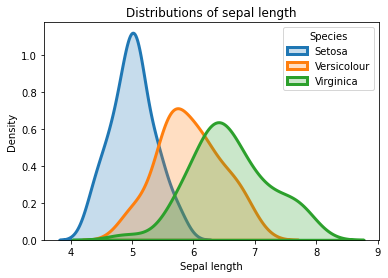

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:, :1]  # sepal length
y = iris.target
labels = ["Setosa", "Versicolour", "Virginica"]

for i in range(3):
  sns.distplot(X[y==i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label=labels[i])
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title="Species");

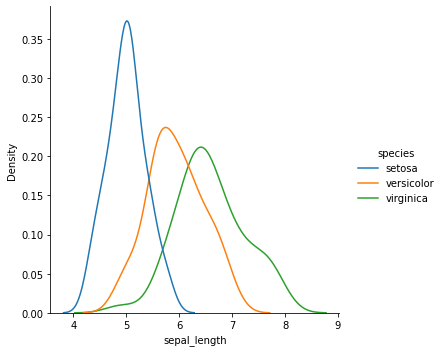

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("iris")
sns.displot(x='sepal_length', data=data, hue="species", kind="kde")
plt.show()

<hr>

# Часть 3 Кластерный анализ и метод главных компонент

## Кластерный анализ методом k-средних

[Сайт для визуализации k-means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

**кратко о k-means**
 - кластерный анализ это метод обучения **без учителя**, в отличие от регрессии
 - количество кластеров задаётся исследователем
 - кластеры задаются с помощью центроидов, которые стремяться в центр каждого кластера, и каждая точка кластера находится наиболее близко к своему центроиду.
 - центроид кластера - аналог центра масс в физике. Или же по аналогии, можно сказать, что центроиды это геометрический центр кластера.

**идея метода**
 - решаем на сколько кластеров будем делить наблюдения
 - случайно выбираем начальные позиции центроидов классов
 - выводим центроиды на наилучшие позиции
 - **Profit**
 
 <img src='https://github.com/KlukvaMors/basic_stat/blob/main/img/k-means.gif?raw=1' width=300/>
 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


 - petal - лепесток
 - sepal - чашелистик (один из зеленых листочков, образующих чашечку цветка)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

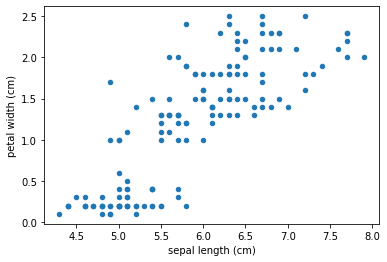

In [ ]:
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)')

Можно предположить, о наличие трёх кластеров тут, попробуем определить их методом k-means.

In [ ]:
from sklearn.cluster import KMeans

# определим метод
kmeans = KMeans(n_clusters=3)
# вырежем данные, которые нам нужны
data = df.loc[:, ['sepal length (cm)','petal width (cm)']]
# построим модель
model = kmeans.fit(data)
# получим кластеры
data['cluster'] = model.labels_
data.head()

,sepal length (cm),petal width (cm),cluster
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

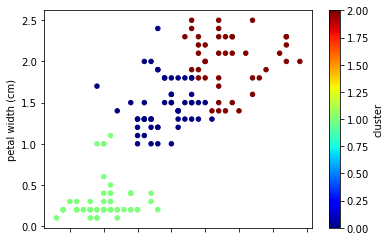

In [ ]:
data.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c='cluster', colormap='jet')

Теперь сравним с реальными видами ирисами, и увидем, что кластеры были разделенны довольно корректно.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

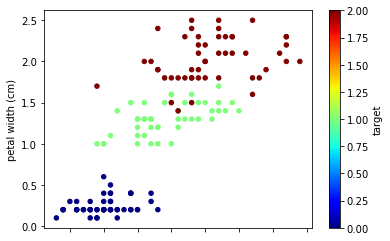

In [ ]:
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c='target', colormap='jet')

## Может-ли-кластерный-анализ-ошибаться?

## Как определить оптимальное число кластеров?

In [ ]:
from pandas import DataFrame
from sklearn.cluster import KMeans

Data = {'x': [-3,1,2,3,5,6,7],
        'y': [3,4,6,8,2,11,1]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(1)
kmeans.fit(df)
print(kmeans.inertia_)

146.0


## Иерархическая кластеризация

## Введение в метод анализа главных компонент

# Как выбрать метод

<img src="https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/img/Untitled%20Diagram.jpg"/>

Таблица: https://yatani.jp/teaching/doku.php?id=hcistats:start
